In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper.

In [3]:
advert = pd.read_csv('Advertising.csv')
advert.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Relationship between Features and Response

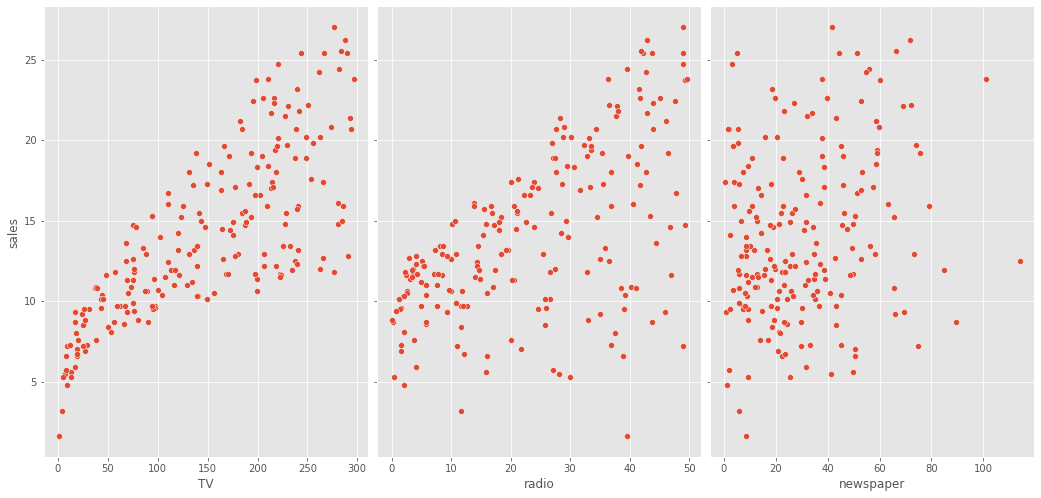

In [5]:
sns.pairplot(advert, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales',
             height=7, aspect=0.7)

### Multiple Linear Regression - Estimating Coefficients

In [7]:
from sklearn.linear_model import LinearRegression

X = advert[['TV', 'radio', 'newspaper']]
y = advert.sales

lnReg = LinearRegression()
lnReg.fit(X, y)

print(lnReg.intercept_)
print(lnReg.coef_)

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


In [8]:
list(zip(['TV', 'radio', 'newspaper'], lnReg.coef_))

[('TV', 0.045764645455397615),
 ('radio', 0.18853001691820448),
 ('newspaper', -0.0010374930424763007)]

<AxesSubplot:>

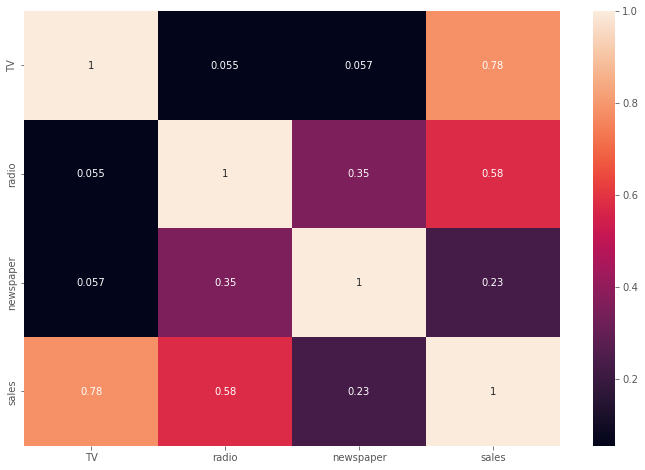

In [10]:
sns.heatmap(advert.corr(), annot=True)

### Feature Selection

In [13]:
from sklearn.metrics import r2_score

lnReg2 = LinearRegression().fit(X[['TV', 'radio']], y)
lnReg2_preds = lnReg2.predict(X[['TV', 'radio']])

print("R^2: ", r2_score(y, lnReg2_preds))

R^2:  0.8971942610828956


In [15]:
lnReg3 = LinearRegression().fit(X[['TV', 'radio', 'newspaper']], y)
lnReg3_preds = lnReg3.predict(X[['TV', 'radio', 'newspaper']])

print("R^2: ", r2_score(y, lnReg3_preds))

R^2:  0.8972106381789522


Due to the tiny difference, newspaper feature will be excluded

In [24]:
X = X.drop(['newspaper'], axis=1)
X

,TV,radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


### Model Evaluation Using Train/Test Split and Metrics

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} \left |y_i - \hat{y_i} \right |$$</h5>
**Mean Squared Error** (MSE) is the mean of the squared errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2$$</h5>
**Root Mean Squared Error** (RMSE) is the mean of the squared errors: <h5 align=center>$$\sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2}$$</h5>

Let's use train/test split with RMSE to see whether newspaper should be kept in the model:

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lnReg4 = LinearRegression().fit(X_train, y_train)
lnReg4_preds = lnReg4.predict(X_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test, lnReg4_preds)))
print("R^2: ", r2_score(y_test, lnReg4_preds))

RMSE:  1.3879034699382886
R^2:  0.9176214942248908


C:\Users\smyra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


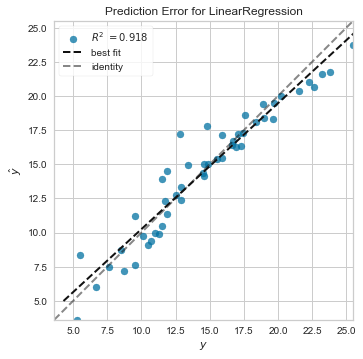

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [27]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer = PredictionError(lnReg4).fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

### Interaction Effect (Synergy)

In [28]:
advert['interaction'] = advert['TV'] * advert['radio']
X = advert[['TV', 'radio', 'interaction']]
y = advert.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lnReg5 = LinearRegression().fit(X_train, y_train)
lnReg5_preds = lnReg5.predict(X_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test, lnReg5_preds)))
print("R^2: ", r2_score(y_test, lnReg5_preds))

RMSE:  0.7011871137164336
R^2:  0.978973681468126


C:\Users\smyra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


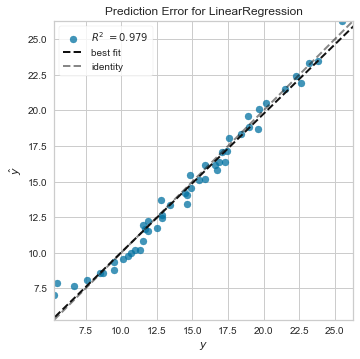

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [29]:
visualizer = PredictionError(lnReg5).fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

Much better results with 97% accurcy!

That's it we are done!